In [1]:
import numpy as np
from pulp import *
import matplotlib.pyplot as plt

In [50]:
prob = LpProblem("Vyroba", LpMaximize)

c1 = 5
c2 = 6

x1 = LpVariable("x1", 0, None, LpContinuous)
x2 = LpVariable("x2", 0, None, LpContinuous)

prob += c1*x1 + c2*x2

prob += 2*x1 + x2 <= 42
prob += x1 + 2*x2 <= 30
prob += x1 + x2 >= 20

prob.solve(PULP_CBC_CMD(msg=0))

print("Status:", LpStatus[prob.status])
print("x1:", x1.varValue)
print("x2:", x2.varValue)
print("Cena:", value(prob.objective))



Status: Optimal
x1: 18.0
x2: 6.0
Cena: 126.0


In [15]:
c = np.array([600, 400])
A = np.array([[2, 0.25], [4, 2], [3,1], [1,4]])
b = np.array([45, 100, 300, 50])

prob = LpProblem("problem", LpMaximize)
x = LpVariable.dicts("x", range(2), lowBound=0, cat='Continuous')
prob += lpSum([c[i]*x[i] for i in range(2)])
for i in range(len(A)):
    prob += lpSum([A[i][j]*x[j] for j in range(2)]) <= b[i]
    
prob.solve(PULP_CBC_CMD(msg=0))

print("Status:", LpStatus[prob.status])
print("Objective value:", value(prob.objective))
print("Solution:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Dual variables:")
for name, c in prob.constraints.items():
    print(name, "=", c.pi)


Status: Optimal
Objective value: 15714.285440000001
Solution:
x_0 = 21.428571
x_1 = 7.1428571
Dual variables:
_C1 = -0.0
_C2 = 142.85714
_C3 = -0.0
_C4 = 28.571429


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


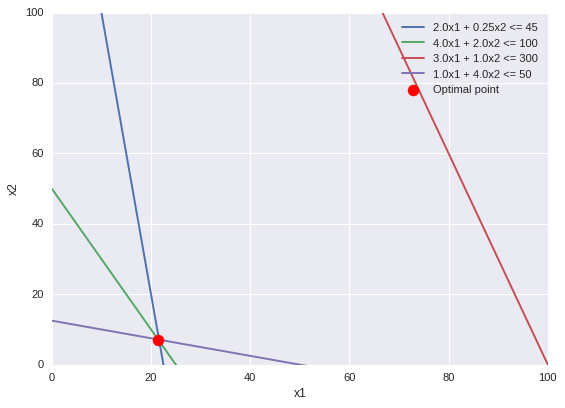

In [14]:
# graph

print(plt.style.available)
plt.style.use("seaborn-v0_8")

# x = np.linspace(0, 100, 100)

for i in range(4):
    y = (b[i] - A[i][0]*x) / A[i][1]
    plt.plot(x, y, label=f"{A[i][0]}x1 + {A[i][1]}x2 <= {b[i]}")

opt = [prob.variables()[0].varValue, prob.variables()[1].varValue]


plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter([prob.variables()[0].varValue], [prob.variables()[1].varValue], color='red', label='Optimal point', s=100, zorder=10)
plt.legend()
plt.show()